# CodeClause Internship
## Created By- Radhika  Aggarwal
### Project- 2: Identify Customer Segments


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import collections
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import Imputer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

%matplotlib inline

### Step 0: Load the Data


In [2]:
# Load in the general demographics data.
azdias = pd.read_csv('Udacity_AZDIAS_Subset.csv', sep=';')

# Load in the feature summary file.
feat_info = pd.read_csv('AZDIAS_Feature_Summary.csv', sep=';')

In [3]:
# Check the structure of the data after it's loaded (e.g. print the number of
# rows and columns, print the first few rows).
azdias.head()

AGER_TYP  ALTERSKATEGORIE_GROB  ANREDE_KZ  CJT_GESAMTTYP  \
0        -1                     2          1            2.0   
1        -1                     1          2            5.0   
2        -1                     3          2            3.0   
3         2                     4          2            2.0   
4        -1                     3          1            5.0   

   FINANZ_MINIMALIST  FINANZ_SPARER  FINANZ_VORSORGER  FINANZ_ANLEGER  \
0                  3              4                 3               5   
1                  1              5                 2               5   
2                  1              4                 1               2   
3                  4              2                 5               2   
4                  4              3                 4               1   

   FINANZ_UNAUFFAELLIGER  FINANZ_HAUSBAUER    ...     PLZ8_ANTG1  PLZ8_ANTG2  \
0                      5                 3    ...            NaN         NaN   
1                      4                 5    ...            2.0         3.0   
2                      3                 5    ...            3.0         3.0   
3                      1                 2    ...            2.0         2.0   
4                      3                 2    ...            2.0         4.0   

   PLZ8_ANTG3  PLZ8_ANTG4  PLZ8_BAUMAX  PLZ8_HHZ  PLZ8_GBZ  ARBEIT  \
0         NaN         NaN          NaN       NaN       NaN     NaN   
1         2.0         1.0          1.0       5.0       4.0     3.0   
2         1.0         0.0          1.0       4.0       4.0     3.0   
3         2.0         0.0          1.0       3.0       4.0     2.0   
4         2.0         1.0          2.0       3.0       3.0     4.0   

   ORTSGR_KLS9  RELAT_AB  
0          NaN       NaN  
1          5.0       4.0  
2          5.0       2.0  
3          3.0       3.0  
4          6.0       5.0  

[5 rows x 85 columns]

In [4]:
azdias.describe()

AGER_TYP  ALTERSKATEGORIE_GROB      ANREDE_KZ  CJT_GESAMTTYP  \
count  891221.000000         891221.000000  891221.000000  886367.000000   
mean       -0.358435              2.777398       1.522098       3.632838   
std         1.198724              1.068775       0.499512       1.595021   
min        -1.000000              1.000000       1.000000       1.000000   
25%        -1.000000              2.000000       1.000000       2.000000   
50%        -1.000000              3.000000       2.000000       4.000000   
75%        -1.000000              4.000000       2.000000       5.000000   
max         3.000000              9.000000       2.000000       6.000000   

       FINANZ_MINIMALIST  FINANZ_SPARER  FINANZ_VORSORGER  FINANZ_ANLEGER  \
count      891221.000000  891221.000000     891221.000000   891221.000000   
mean            3.074528       2.821039          3.401106        3.033328   
std             1.321055       1.464749          1.322134        1.529603   
min             1.000000       1.000000          1.000000        1.000000   
25%             2.000000       1.000000          3.000000        2.000000   
50%             3.000000       3.000000          3.000000        3.000000   
75%             4.000000       4.000000          5.000000        5.000000   
max             5.000000       5.000000          5.000000        5.000000   

       FINANZ_UNAUFFAELLIGER  FINANZ_HAUSBAUER      ...          PLZ8_ANTG1  \
count          891221.000000     891221.000000      ...       774706.000000   
mean                2.874167          3.075121      ...            2.253330   
std                 1.486731          1.353248      ...            0.972008   
min                 1.000000          1.000000      ...            0.000000   
25%                 2.000000          2.000000      ...            1.000000   
50%                 3.000000          3.000000      ...            2.000000   
75%                 4.000000          4.000000      ...            3.000000   
max                 5.000000          5.000000      ...            4.000000   

          PLZ8_ANTG2     PLZ8_ANTG3     PLZ8_ANTG4    PLZ8_BAUMAX  \
count  774706.000000  774706.000000  774706.000000  774706.000000   
mean        2.801858       1.595426       0.699166       1.943913   
std         0.920309       0.986736       0.727137       1.459654   
min         0.000000       0.000000       0.000000       1.000000   
25%         2.000000       1.000000       0.000000       1.000000   
50%         3.000000       2.000000       1.000000       1.000000   
75%         3.000000       2.000000       1.000000       3.000000   
max         4.000000       3.000000       2.000000       5.000000   

            PLZ8_HHZ       PLZ8_GBZ         ARBEIT    ORTSGR_KLS9  \
count  774706.000000  774706.000000  794005.000000  794005.000000   
mean        3.612821       3.381087       3.167854       5.293002   
std         0.973967       1.111598       1.002376       2.303739   
min         1.000000       1.000000       1.000000       0.000000   
25%         3.000000       3.000000       3.000000       4.000000   
50%         4.000000       3.000000       3.000000       5.000000   
75%         4.000000       4.000000       4.000000       7.000000   
max         5.000000       5.000000       9.000000       9.000000   

           RELAT_AB  
count  794005.00000  
mean        3.07222  
std         1.36298  
min         1.00000  
25%         2.00000  
50%         3.00000  
75%         4.00000  
max         9.00000  

[8 rows x 81 columns]

In [5]:
azdias.shape

(891221, 85)

## Step 1: Preprocessing

### Step 1.1: Assess Missing Data

#### Step 1.1.1: Convert Missing Value Codes to NaNs

In [6]:
# Identify missing or unknown data values and convert them to NaNs.
def define_missing(string):
    def_missing = string.replace('[', '').replace(']', '').split(',')

    if(def_missing != None):
        for i in range(len(def_missing)):
            try: def_missing[i] = int(def_missing[i])
            except ValueError: continue 

    return def_missing

In [7]:
pd.value_counts(azdias.AGER_TYP)

-1    677503
 2     98472
 1     79802
 3     27104
 0      8340
Name: AGER_TYP, dtype: int64

In [8]:
feat_info.head()

attribute information_level         type missing_or_unknown
0              AGER_TYP            person  categorical             [-1,0]
1  ALTERSKATEGORIE_GROB            person      ordinal           [-1,0,9]
2             ANREDE_KZ            person  categorical             [-1,0]
3         CJT_GESAMTTYP            person  categorical                [0]
4     FINANZ_MINIMALIST            person      ordinal               [-1]

In [9]:
#num previously missing values from whole df
print('total NaN: %s \n'%sum(azdias.isnull().sum()))
print('NaN per column\n %s'%azdias.isnull().sum().describe())

total NaN: 4896838 

NaN per column
 count        85.000000
mean      57609.858824
std       78323.462873
min           0.000000
25%           0.000000
50%       18348.000000
75%       98979.000000
max      584612.000000
dtype: float64


#### Step 1.1.2: Assess Missing Data in Each Column

In [11]:
# Perform an assessment of how much missing data there is in each column of the dataset.
null_count = np.asarray(azdias.isnull().sum().tolist())
print(null_count)

[685843   2881      0   4854      0      0      0      0      0      0
      0 392318   4854      0 111196  97632  94572  77792  77792   4854
   4854 108315 108164   4854      0      0      0      0      0      0
      0      0      0      0      0      0      0      0 111196  73499
 889061 111196      0 310267  73499  73499  18348 584612 147988  73499
  99611  97008  93148  73969  93148  93148  93148  99352  99352  99352
 133324 133324 133324 133324 476524 133324  93740  93740  93740  93155
 158064 133324   4854 158064 105800 116515 116515 116515 116515 116515
 116515 116515  97375  97274  97375]


In [12]:
# Investigate patterns in the amount of missing data in each column.
azdias.isnull().sum().describe()

count        85.000000
mean      98516.811765
std      146604.203317
min           0.000000
25%           0.000000
50%       93148.000000
75%      116515.000000
max      889061.000000
dtype: float64

In [13]:
#most common # of NaN: from `https://docs.python.org/2/library/collections.html#collections.Counter`
collections.Counter(null_count).most_common(12)

[(0, 24),
 (116515, 7),
 (4854, 6),
 (133324, 6),
 (73499, 4),
 (93148, 4),
 (111196, 3),
 (99352, 3),
 (93740, 3),
 (77792, 2),
 (158064, 2),
 (97375, 2)]

In [14]:
plt.hist(null_count, bins=30)
plt.xlabel("# of NaN")
plt.ylabel('# of features')
plt.show()

In [15]:
i_5, i_10, i_15, i_20 = 0,0,0,0
for value in null_count:
    if(value > 200000):
        i_20+=1
    elif(value > 150000):
        i_15 +=1
    elif(value>100000):
        i_10+=1
    elif(value>50000):
        i_5+=1

print('num null > 200,000: %s' % i_20, ' 200k-150k: %s'%i_15,' 150k-100k: %s'%i_10, ' 100k-50k: %s'%i_5)

num null > 200,000: 6  200k-150k: 2  150k-100k: 20  100k-50k: 25


In [16]:
# Remove the outlier columns from the dataset.
labels_to_clean = []
for col in azdias:
    if(azdias[col].isnull().sum()>200000):
        labels_to_clean.append(col)
azdias_cleaned = azdias.drop(labels_to_clean, axis=1)

In [17]:
print(azdias_cleaned.shape)

for label in labels_to_clean:
    print(feat_info[feat_info['attribute'] == label][['attribute', 'information_level', 'type']])
    print('\n')

(891221, 79)
  attribute information_level         type
0  AGER_TYP            person  categorical


      attribute information_level     type
11  GEBURTSJAHR            person  numeric


   attribute information_level         type
40  TITEL_KZ            person  categorical


   attribute information_level      type
43  ALTER_HH         household  interval


       attribute information_level         type
47  KK_KUNDENTYP         household  categorical


       attribute information_level   type
64  KBA05_BAUMAX     microcell_rr3  mixed




#### Step 1.1.3: Assess Missing Data in Each Row

In [18]:
# How much data is missing in each row of the dataset?
azdias.isnull().sum(axis=1).describe() #count isnull along axis=1 --> along each row

count    891221.000000
mean          9.396018
std          13.971829
min           0.000000
25%           3.000000
50%           4.000000
75%           6.000000
max          54.000000
dtype: float64

In [19]:
plt.figure(figsize=(14,4)) # this creates a figure 8 inch wide, 4 inch high
ax = sns.countplot(azdias.isnull().sum(axis=1))
ax.set_xlabel('# missing values')
plt.show()
##number of rows/data points that has x missing values

In [20]:
# Write code to divide the data into two subsets based on the number of missing values in each row.
azdias_cleaned['num_null'] = azdias_cleaned.isnull().sum(axis=1)

In [21]:
#split into datum that have less than and more than 20 missing values
azdias_low = azdias_cleaned.query('num_null < 21').drop('num_null', axis=1)
azdias_high = azdias_cleaned.query('num_null > 20').drop('num_null', axis=1)
print(azdias_low.shape)
print(azdias_high.shape)

(797426, 79)
(93795, 79)


In [22]:
plt.figure(figsize=(20,20))
for i, col in enumerate(azdias_low.columns[:10]):
    plt.subplot(5, 2, i+1)
    sns.distplot(azdias_low[col][azdias_low[col].notnull()], label='low_NaN')
    sns.distplot(azdias_high[col][azdias_high[col].notnull()], label='high_NaN')
    plt.title('Distribution for column: {}'.format(col))
    plt.tight_layout()
    plt.legend();

In [23]:
# Compare the distribution of values for at least five columns where there are no or few missing values, between the two subsets.
def graph_value_dist(column):
    fig, (ax1, ax2) = plt.subplots(1,2, sharey=True)
    ax1.set_title('low NaN data')
    ax2.set_title('high NaN data')
    sns.countplot(azdias_low[column], ax=ax1)
    sns.countplot(azdias_high[column], ax=ax2)
    plt.show()

In [24]:
#get column names for distribution analysis
cols=[1,3,4,5,6,11]
col_names = []
for i in cols:
    null1 = azdias_low.iloc[:,i].isnull().sum()
    null2 = azdias_high.iloc[:,i].isnull().sum()
    col_name = azdias_low.iloc[:,i].name
    if(null1+null2 == 0):
        col_names.append(col_name)
        
print(col_names)

['ANREDE_KZ', 'FINANZ_MINIMALIST', 'FINANZ_SPARER', 'FINANZ_VORSORGER', 'FINANZ_ANLEGER', 'GREEN_AVANTGARDE']


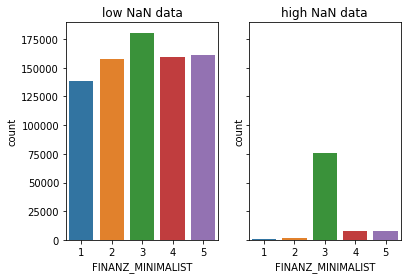

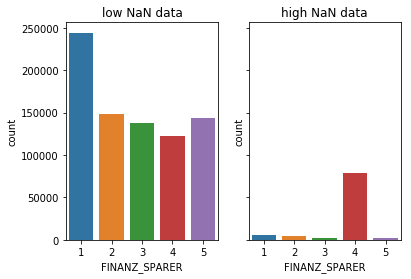

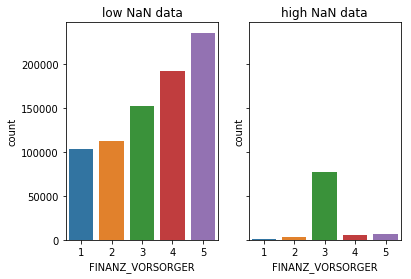

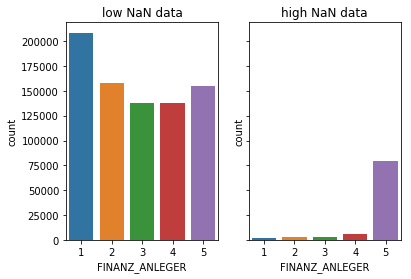

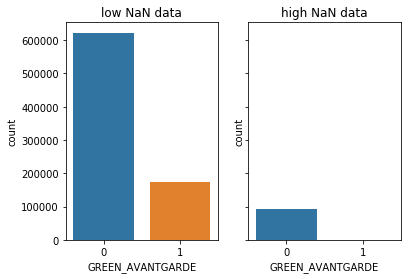

In [25]:
for col in col_names:
    graph_value_dist(col)

### Step 1.2: Select and Re-Encode Features

In [26]:
# How many features are there of each data type?
#feat_info.groupby('type')['attribute'].nunique()
feat_info['type'].value_counts()

ordinal        49
categorical    21
numeric         7
mixed           7
interval        1
Name: type, dtype: int64

#### Step 1.2.1: Re-Encode Categorical Features



In [27]:
# Assess categorical variables: which are binary, which are multi-level, and
# which one needs to be re-encoded?
cat_vars = feat_info[feat_info['type'] == 'categorical']['attribute'].tolist()

for var in cat_vars:
    print(azdias[var].describe())
    print(azdias[var].isnull().sum())

count    205378.000000
mean          1.743410
std           0.674312
min           1.000000
25%           1.000000
50%           2.000000
75%           2.000000
max           3.000000
Name: AGER_TYP, dtype: float64
685843
count    891221.000000
mean          1.522098
std           0.499512
min           1.000000
25%           1.000000
50%           2.000000
75%           2.000000
max           2.000000
Name: ANREDE_KZ, dtype: float64
0
count    886367.000000
mean          3.632838
std           1.595021
min           1.000000
25%           2.000000
50%           4.000000
75%           5.000000
max           6.000000
Name: CJT_GESAMTTYP, dtype: float64
4854
count    891221.000000
mean          3.790586
std           1.987876
min           1.000000
25%           2.000000
50%           4.000000
75%           6.000000
max           6.000000
Name: FINANZTYP, dtype: float64
0
count    886367.000000
mean          7.350304
std           3.525723
min           1.000000
25%           5.000000
50

In [28]:
azdias['OST_WEST_KZ'].value_counts()

W    629528
O    168545
Name: OST_WEST_KZ, dtype: int64

In [29]:
# Re-encode categorical variable(s) to be kept in the analysis.
azdias_low['WEST_KZ'] = azdias_low['OST_WEST_KZ'].replace({'W':1, 'O':0})
azdias_low['WEST_KZ'].value_counts()

1    628987
0    168439
Name: WEST_KZ, dtype: int64

In [30]:
def imputer_freq(df, var): #fill in NaN with most common value in column
    most_freq = df[var].value_counts().idxmax()
    return df[var].fillna(most_freq)

In [31]:
one_hot_vars = ['CJT_GESAMTTYP', 'FINANZTYP','GFK_URLAUBERTYP', 'LP_FAMILIE_FEIN', 
                'LP_FAMILIE_GROB', 'LP_STATUS_FEIN', 'LP_STATUS_GROB', 'NATIONALITAET_KZ', 
                'SHOPPER_TYP', 'ZABEOTYP', 'GEBAEUDETYP', 'CAMEO_DEUG_2015', 'CAMEO_DEU_2015']
for var in one_hot_vars:
    imputed_data = imputer_freq(azdias_low, var) #fill na-- imputation
    encode = pd.get_dummies(imputed_data, prefix=var) #one hot encode
    azdias_low = azdias_low.drop(var, axis=1) # remove column we onehot
    
    for col in encode.columns: #insert new encoded columns into the dataset
        azdias_low[col] = encode[col] 
        print(azdias_low.shape)

(797426, 80)
(797426, 81)
(797426, 82)
(797426, 83)
(797426, 84)
(797426, 85)
(797426, 85)
(797426, 86)
(797426, 87)
(797426, 88)
(797426, 89)
(797426, 90)
(797426, 90)
(797426, 91)
(797426, 92)
(797426, 93)
(797426, 94)
(797426, 95)
(797426, 96)
(797426, 97)
(797426, 98)
(797426, 99)
(797426, 100)
(797426, 101)
(797426, 101)
(797426, 102)
(797426, 103)
(797426, 104)
(797426, 105)
(797426, 106)
(797426, 107)
(797426, 108)
(797426, 109)
(797426, 110)
(797426, 111)
(797426, 111)
(797426, 112)
(797426, 113)
(797426, 114)
(797426, 115)
(797426, 115)
(797426, 116)
(797426, 117)
(797426, 118)
(797426, 119)
(797426, 120)
(797426, 121)
(797426, 122)
(797426, 123)
(797426, 124)
(797426, 124)
(797426, 125)
(797426, 126)
(797426, 127)
(797426, 128)
(797426, 128)
(797426, 129)
(797426, 130)
(797426, 130)
(797426, 131)
(797426, 132)
(797426, 133)
(797426, 133)
(797426, 134)
(797426, 135)
(797426, 136)
(797426, 137)
(797426, 138)
(797426, 138)
(797426, 139)
(797426, 140)
(797426, 141)
(797426, 142)


In [32]:
drop_categorical = ['KK_KUNDENTYP', 'TITEL_KZ', 'AGER_TYP']
for category in drop_categorical:
    try: azdias_low = azdias_low.drop(category, axis=1)
    except ValueError: print('{0} already cleaned from dataset'.format(category))

KK_KUNDENTYP already cleaned from dataset
TITEL_KZ already cleaned from dataset
AGER_TYP already cleaned from dataset


#### Step 1.2.2: Engineer Mixed-Type Features


In [33]:
# Investigate "PRAEGENDE_JUGENDJAHRE" and engineer two new variables.
print(azdias['PRAEGENDE_JUGENDJAHRE'].value_counts())
decade_mapping = {1:40, 2:40,3:50,4:50,5:60,6:60,7:60,8:70,9:70,10:80,11:80,12:80,13:80,14:90,15:90}
avantgarde_mapping ={1:0,2:1,3:0,4:1,5:0,6:1,7:1,8:0,9:1,10:0,11:1,12:0,13:1,14:0,15:1}

azdias_low['AVANTGARDE'] = azdias_low['PRAEGENDE_JUGENDJAHRE'].map(avantgarde_mapping)
azdias_low['YOUTH_DECADE'] = azdias_low['PRAEGENDE_JUGENDJAHRE'].map(decade_mapping)

#impute null values
azdias_low['AVANTGARDE'] = imputer_freq(azdias_low, 'AVANTGARDE')
azdias_low['YOUTH_DECADE'] = imputer_freq(azdias_low, 'YOUTH_DECADE')

14.0    188697
8.0     145988
5.0      86416
10.0     85808
3.0      55195
15.0     42547
11.0     35752
9.0      33570
6.0      25652
12.0     24446
1.0      21282
4.0      20451
2.0       7479
13.0      5764
7.0       4010
Name: PRAEGENDE_JUGENDJAHRE, dtype: int64


In [34]:
# Investigate "CAMEO_INTL_2015" and engineer two new variables.
print('number of nulls: %s'%azdias_low['CAMEO_INTL_2015'].isnull().sum())
print('value counts: %s' % azdias_low['CAMEO_INTL_2015'].value_counts())

number of nulls: 6003
value counts: 51    133673
41     92309
24     91099
14     62851
43     56653
54     45376
25     39605
22     33137
23     26667
13     26311
45     26126
55     23939
52     20538
31     18979
34     18517
15     16966
44     14817
12     13234
35     10352
32     10346
33      9928
Name: CAMEO_INTL_2015, dtype: int64


In [35]:
def decode_wealth(key):
    if(len(str(key))==2):
        tens = int(str(key)[0])
        return tens
    else: return np.nan
    
def decode_life(key):
    if(len(str(key))==2):
        ones = int(str(key)[1])
        return ones
    else: return np.nan

In [36]:
'''ENGINEERING OF `CAMEO_INTL_2015` '''
azdias_low['CAMEO_INTL_2015_WEALTH'] = azdias_low['CAMEO_INTL_2015'].apply(decode_wealth)
azdias_low['CAMEO_INTL_2015_LIFE'] = azdias_low['CAMEO_INTL_2015'].apply(decode_life)

#impute nan values
azdias_low['CAMEO_INTL_2015_WEALTH'] = imputer_freq(azdias_low, 'CAMEO_INTL_2015_WEALTH')
azdias_low['CAMEO_INTL_2015_LIFE'] = imputer_freq(azdias_low, 'CAMEO_INTL_2015_LIFE')

In [37]:
mixed_feat = feat_info[feat_info['type'] == 'mixed']['attribute'].tolist()
mixed_feat.remove('PRAEGENDE_JUGENDJAHRE')
mixed_feat.remove('CAMEO_INTL_2015')
print(mixed_feat)

['LP_LEBENSPHASE_FEIN', 'LP_LEBENSPHASE_GROB', 'WOHNLAGE', 'KBA05_BAUMAX', 'PLZ8_BAUMAX']


In [38]:
#INVESTIGATE REMAINING MIXED-VARS
for feat in mixed_feat:
    try: print('{0} has {1} null values'.format(feat, azdias_low[feat].isnull().sum()))
    except KeyError: mixed_feat.remove(feat);

LP_LEBENSPHASE_FEIN has 49651 null values
LP_LEBENSPHASE_GROB has 46830 null values
WOHNLAGE has 0 null values


In [39]:
for feat in mixed_feat:
    print('{0} has {1} null values'.format(feat, azdias_low[feat].value_counts()))

LP_LEBENSPHASE_FEIN has 1.0     58722
5.0     52400
6.0     43334
2.0     37148
8.0     28837
11.0    25369
7.0     24950
29.0    24880
13.0    24811
10.0    24469
12.0    22275
31.0    22261
30.0    21147
15.0    18966
3.0     18756
19.0    18586
37.0    17500
4.0     16478
14.0    16354
20.0    16287
32.0    15763
39.0    15132
40.0    14108
27.0    13800
16.0    13633
38.0    13099
35.0    13011
34.0    12422
9.0     12111
21.0    11966
28.0    11543
24.0    11309
25.0     9849
36.0     9656
23.0     8628
22.0     6831
18.0     6805
33.0     5724
17.0     5487
26.0     3368
Name: LP_LEBENSPHASE_FEIN, dtype: int64 null values
LP_LEBENSPHASE_GROB has 2.0     149521
1.0     131104
3.0     109623
12.0     69495
4.0      51186
5.0      47165
9.0      46027
10.0     38024
11.0     31157
8.0      28711
6.0      27425
7.0      21158
Name: LP_LEBENSPHASE_GROB, dtype: int64 null values
WOHNLAGE has 3.0    249592
7.0    169269
4.0    135906
2.0    100328
5.0     74305
1.0     43891
8.0     173

In [40]:
rural_map={1:0,2:0,3:0,4:0,5:0,7:1,8:1}
azdias_low['RURAL'] = azdias_low['WOHNLAGE'].map(rural_map)
azdias_high['RURAL'] = azdias_high['WOHNLAGE'].map(rural_map)

#### Step 1.2.3: Complete Feature Selection


In [41]:
#double check that features have been dropped
one_hot_vars = ['CJT_GESAMTTYP', 'FINANZTYP','GFK_URLAUBERTYP', 'LP_FAMILIE_FEIN', 
                'LP_FAMILIE_GROB', 'LP_STATUS_FEIN', 'LP_STATUS_GROB', 'NATIONALITAET_KZ', 
                'SHOPPER_TYP', 'ZABEOTYP', 'GEBAEUDETYP', 'CAMEO_DEUG_2015', 'CAMEO_DEU_2015']
drop_categorical = ['KK_KUNDENTYP', 'TITEL_KZ', 'AGER_TYP',
                       'LP_LEBENSPHASE_FEIN', 'LP_LEBENSPHASE_GROB', 'WOHNLAGE', 'KBA05_BAUMAX','PLZ8_BAUMAX'] #high error categoricals

mixed_cat = ['PRAEGENDE_JUGENDJAHRE', 'CAMEO_INTL_2015']
for feature in one_hot_vars+drop_categorical+mixed_cat + ['OST_WEST_KZ']:
    if feature in azdias_low.columns:
        print('cleaning {0}:'.format(feature))
        azdias_low = azdias_low.drop(feature, axis=1)

cleaning LP_LEBENSPHASE_FEIN:
cleaning LP_LEBENSPHASE_GROB:
cleaning WOHNLAGE:
cleaning PLZ8_BAUMAX:
cleaning PRAEGENDE_JUGENDJAHRE:
cleaning CAMEO_INTL_2015:
cleaning OST_WEST_KZ:


### Step 1.3: Create a Cleaning Function

In [42]:
def clean_data(df):
    """
    Perform feature trimming, re-encoding, and engineering for demographics
    data
    
    INPUT: Demographics DataFrame
    OUTPUT: Trimmed and cleaned demographics DataFrame
    """
    
    '''all main cleaning steps:'''
    # convert missing value codes into NaNs, ...
    for col in df:
        missing_rep = define_missing(feat_info[feat_info['attribute']==col]['missing_or_unknown'].values[0])
        if(missing_rep[0] == ''): 
            df[col] = df[col].replace('', np.nan)
        else:
            replace_with = [np.nan for i in missing_rep] #create list of None same length as missing_rep
            df[col] = df[col].replace(missing_rep, replace_with)
    # remove selected columns and rows, ...
    features_to_clean = ['AGER_TYP','GEBURTSJAHR','TITEL_KZ', 'ALTER_HH', 'KK_KUNDENTYP',
                         'KBA05_BAUMAX']
    
    df = df.drop(features_to_clean, axis=1)
    df['num_null'] = df.isnull().sum(axis=1) #count null for each row
    
    #keep only low missing value rows
    df = df.query('num_null < 21').drop('num_null', axis=1)
    
    # select, re-encode, and engineer column values.
    cat_vars = feat_info[feat_info['type'] == 'categorical']['attribute'].tolist()
    mixed_vars = feat_info[feat_info['type'] == 'mixed']['attribute'].tolist()
    
    #re-encode binary var
    df['WEST_KZ'] = df['OST_WEST_KZ'].replace({'W':1, 'O':0})
    
    #one hot encode
    one_hot_vars = ['CJT_GESAMTTYP', 'FINANZTYP','GFK_URLAUBERTYP', 'LP_FAMILIE_FEIN', 
                'LP_FAMILIE_GROB', 'LP_STATUS_FEIN', 'LP_STATUS_GROB', 'NATIONALITAET_KZ', 
                'SHOPPER_TYP', 'ZABEOTYP', 'GEBAEUDETYP', 'CAMEO_DEUG_2015', 'CAMEO_DEU_2015']
    
    for var in one_hot_vars:
        imputed_data = imputer_freq(df, var) #fill na-- imputation
        encode = pd.get_dummies(imputed_data, prefix=var) #one hot encode

        for col in encode.columns: #insert new encoded columns into the dataset
            df[col] = encode[col] 
            
    #engineer mixed vars
    decade_mapping = {1:40, 2:40,3:50,4:50,5:60,6:60,7:60,8:70,
                      9:70,10:80,11:80,12:80,13:80,14:90,15:90}
    avantgarde_mapping ={1:0,2:1,3:0,4:1,5:0,6:1,7:1,8:0,
                         9:1,10:0,11:1,12:0,13:1,14:0,15:1}
    
    rural_mapping = {1:0,2:0,3:0,4:0,5:0,7:1,8:1}
        #map variables
    df['RURAL'] = df['WOHNLAGE'].map(rural_mapping)
    df['AVANTGARDE'] = df['PRAEGENDE_JUGENDJAHRE'].map(avantgarde_mapping)
    df['YOUTH_DECADE'] = df['PRAEGENDE_JUGENDJAHRE'].map(decade_mapping)
    
    df['CAMEO_INTL_2015_WEALTH'] = df['CAMEO_INTL_2015'].apply(decode_wealth)
    df['CAMEO_INTL_2015_LIFE'] = df['CAMEO_INTL_2015'].apply(decode_life)
    
    #remove all features either re-encoded, or not needed for analysis
    drop_categorical = ['KK_KUNDENTYP', 'TITEL_KZ', 'AGER_TYP',
                       'LP_LEBENSPHASE_FEIN', 'LP_LEBENSPHASE_GROB',
                        'WOHNLAGE', 'KBA05_BAUMAX','PLZ8_BAUMAX'] #high error categoricals
    
    shape_before = df.shape[1]
    mixed_cat = ['PRAEGENDE_JUGENDJAHRE', 'CAMEO_INTL_2015']
    to_drop = one_hot_vars+drop_categorical+mixed_cat+['OST_WEST_KZ']

    #already removed in high NaN column cleaning, make sure we dont try to drop again
    for removed in ['AGER_TYP','GEBURTSJAHR','TITEL_KZ', 'ALTER_HH', 'KK_KUNDENTYP',
                         'KBA05_BAUMAX']:
        if removed in to_drop:
            to_drop.remove(removed)
    
    df = df.drop(to_drop, axis=1) 

    # Return the cleaned dataframe.
    
    return df
    

## Step 2: Feature Transformation

### Step 2.1: Apply Feature Scaling


In [43]:

azdias_low.isnull().sum(axis=0).describe()

count      193.000000
mean      3573.564767
std      11363.386643
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max      64433.000000
dtype: float64

In [44]:
feat_info['type'].value_counts()

ordinal        49
categorical    21
numeric         7
mixed           7
interval        1
Name: type, dtype: int64

In [45]:

imputer = Imputer(missing_values='NaN', strategy='most_frequent', axis=0)
azdias_imputed = pd.DataFrame(imputer.fit_transform(azdias_low),
                              index=azdias_low.index, columns=azdias_low.columns)

#end result is new imputed DF

In [46]:
azdias_imputed.isnull().sum(axis=1).describe()
#check that no more null

count    797426.0
mean          0.0
std           0.0
min           0.0
25%           0.0
50%           0.0
75%           0.0
max           0.0
dtype: float64

In [47]:
# Apply feature scaling to the general population demographics data.
scaler = StandardScaler()

azdias_scaled = pd.DataFrame(scaler.fit_transform(azdias_imputed),
                              index=azdias_imputed.index, columns=azdias_imputed.columns)

In [48]:
azdias_scaled.describe()

ALTERSKATEGORIE_GROB     ANREDE_KZ  FINANZ_MINIMALIST  FINANZ_SPARER  \
count          7.974260e+05  7.974260e+05       7.974260e+05   7.974260e+05   
mean           8.509483e-17  8.277811e-17       1.346548e-16  -8.425725e-17   
std            1.000001e+00  1.000001e+00       1.000001e+00   1.000001e+00   
min           -1.766334e+00 -1.043765e+00      -1.494609e+00  -1.155304e+00   
25%           -7.828722e-01 -1.043765e+00      -7.686897e-01  -1.155304e+00   
50%            2.005893e-01  9.580705e-01      -4.276997e-02   1.914482e-01   
75%            1.184051e+00  9.580705e-01       6.831497e-01   8.648242e-01   
max            1.184051e+00  9.580705e-01       1.409069e+00   1.538200e+00   

       FINANZ_VORSORGER  FINANZ_ANLEGER  FINANZ_UNAUFFAELLIGER  \
count      7.974260e+05    7.974260e+05           7.974260e+05   
mean      -3.776250e-17   -9.630418e-17           1.835286e-16   
std        1.000001e+00    1.000001e+00           1.000001e+00   
min       -1.766955e+00   -1.249881e+00          -1.184467e+00   
25%       -1.040726e+00   -1.249881e+00          -1.184467e+00   
50%        4.117312e-01    1.082835e-01          -4.697522e-01   
75%        1.137960e+00    7.873659e-01           9.596769e-01   
max        1.137960e+00    1.466448e+00           1.674391e+00   

       FINANZ_HAUSBAUER  GREEN_AVANTGARDE    HEALTH_TYP      ...       \
count      7.974260e+05      7.974260e+05  7.974260e+05      ...        
mean      -8.126334e-17     -1.561111e-17 -8.625319e-17      ...        
std        1.000001e+00      1.000001e+00  1.000001e+00      ...        
min       -1.502317e+00     -5.305674e-01 -1.633717e+00      ...        
25%       -7.920337e-01     -5.305674e-01 -3.116745e-01      ...        
50%       -8.175029e-02     -5.305674e-01 -3.116745e-01      ...        
75%        6.285331e-01     -5.305674e-01  1.010368e+00      ...        
max        1.338816e+00      1.884775e+00  1.010368e+00      ...        

       CAMEO_DEU_2015_9A  CAMEO_DEU_2015_9B  CAMEO_DEU_2015_9C  \
count       7.974260e+05       7.974260e+05       7.974260e+05   
mean       -2.060988e-17       3.715659e-18      -1.407852e-18   
std         1.000001e+00       1.000001e+00       1.000001e+00   
min        -1.625923e-01      -1.895778e-01      -1.798523e-01   
25%        -1.625923e-01      -1.895778e-01      -1.798523e-01   
50%        -1.625923e-01      -1.895778e-01      -1.798523e-01   
75%        -1.625923e-01      -1.895778e-01      -1.798523e-01   
max         6.150354e+00       5.274880e+00       5.560118e+00   

       CAMEO_DEU_2015_9D  CAMEO_DEU_2015_9E    AVANTGARDE  YOUTH_DECADE  \
count       7.974260e+05       7.974260e+05  7.974260e+05  7.974260e+05   
mean        1.045464e-16       5.556559e-17 -1.561111e-17 -3.827753e-16   
std         1.000001e+00       1.000001e+00  1.000001e+00  1.000001e+00   
min        -1.928439e-01      -8.974298e-02 -5.305674e-01 -2.316187e+00   
25%        -1.928439e-01      -8.974298e-02 -5.305674e-01 -9.502996e-01   
50%        -1.928439e-01      -8.974298e-02 -5.305674e-01  4.155877e-01   
75%        -1.928439e-01      -8.974298e-02 -5.305674e-01  1.098531e+00   
max         5.185540e+00       1.114293e+01  1.884775e+00  1.098531e+00   

       CAMEO_INTL_2015_WEALTH  CAMEO_INTL_2015_LIFE         RURAL  
count            7.974260e+05          7.974260e+05  7.974260e+05  
mean             4.856197e-17          4.130886e-17  3.727688e-17  
std              1.000001e+00          1.000001e+00  1.000001e+00  
min             -1.551476e+00         -1.249157e+00 -5.528315e-01  
25%             -8.696736e-01         -1.249157e+00 -5.528315e-01  
50%              4.939317e-01          9.484474e-02 -5.528315e-01  
75%              1.175734e+00          7.668454e-01 -5.528315e-01  
max              1.175734e+00          1.438846e+00  1.808870e+00  

[8 rows x 193 columns]

### Step 2.2: Perform Dimensionality Reduction

Apply PCA on scaled data


In [49]:
# Apply PCA to the data.
pca = PCA()
pca_fit = pca.fit(azdias_scaled)

In [50]:
def scree_plot(pca): ##code from helper_functions.py in PCA lesson
    '''
    Creates a scree plot associated with the principal components 
    
    INPUT: pca - the result of instantian of PCA in scikit learn
            
    RETURN: None
    '''
    num_components= len(pca.explained_variance_ratio_)
    idx = np.arange(num_components)
    vals = pca.explained_variance_ratio_
 
    plt.figure(figsize=(15, 10))
    ax = plt.subplot(111)
    cumvals = np.cumsum(vals)
    ax.bar(idx, vals)
    ax.plot(idx, cumvals)
    for i in range(num_components):
        if(i%20 == 0 or i<6):
            ax.annotate(r"%s%%" % ((str(vals[i]*100)[:4])), (idx[i]+0.2, vals[i]), va="bottom", ha="center", fontsize=8)
 
    ax.xaxis.set_tick_params(width=0, gridOn=True)
    ax.yaxis.set_tick_params(width=2, length=12, gridOn=True)
 
    ax.set_xlabel("Principal Component")
    ax.set_ylabel("Variance Explained (%)")
    plt.title('Explained Variance Per Principal Component')

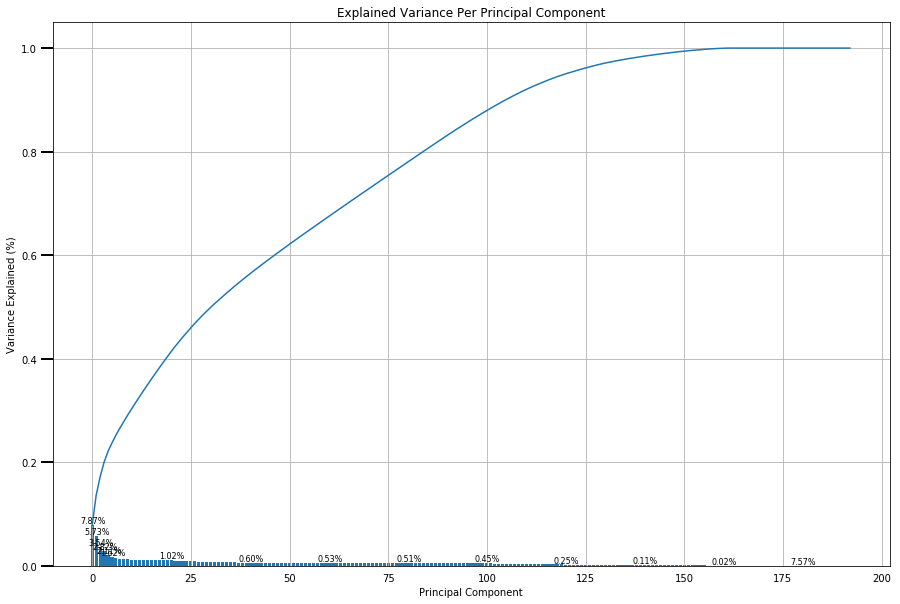

In [51]:
# Investigate the variance accounted for by each principal component.
scree_plot(pca_fit)

In [65]:
# Re-apply PCA to the data while selecting for number of components to retain.
pca = PCA(n_components=75)
pca.fit(azdias_scaled)
pca_data = pca.transform(azdias_scaled)

In [63]:
pca_data.shape

(797426, 75)

### Step 2.3: Interpret Principal Components


In [64]:
def investigate_PC(pca, component, feature_names):
    #code inspired by helper_functions.py in PCA lesson
    '''
    Prints association of a feature to the weights of its components
    INPUT: pca: PCA object, compnent: which component is to be investigated (0 indexed),
            feature_names: the corresponding feature names to PCA
    OUTPUT: None
    '''
    
    num_out = 10
    
    if(component <= len(pca.components_)):
        pca_feature_map = pd.DataFrame({'weight': pca.components_[component],
                                        'name': feature_names})
        
        pca_feature_map = pca_feature_map.sort_values(by='weight', ascending=False)
        
        print('Principal Component {}\n---------------\n'.format(component+1))
        print('TOP {0} PRINCIPAL COMPONENTS \n {1}'.format(num_out, pca_feature_map.iloc[:num_out,:]))
        print('\n BOTTOM {0} PRINCIPAL COMPONENTS \n {1}'.format(num_out, pca_feature_map.iloc[-num_out:,:]))
            
    else:
        print('Error in selecting component')
    

In [65]:

investigate_PC(pca, 0, azdias_scaled.columns)

Principal Component 1
---------------

TOP 10 PRINCIPAL COMPONENTS 
                        name    weight
110      LP_STATUS_GROB_1.0  0.196198
29       HH_EINKOMMEN_SCORE  0.184257
190  CAMEO_INTL_2015_WEALTH  0.184198
52               PLZ8_ANTG3  0.182683
53               PLZ8_ANTG4  0.175970
57              ORTSGR_KLS9  0.158971
42                 EWDICHTE  0.156777
7          FINANZ_HAUSBAUER  0.147975
39              KBA05_ANTG4  0.129277
100      LP_STATUS_FEIN_1.0  0.126992

 BOTTOM 10 PRINCIPAL COMPONENTS 
                    name    weight
113  LP_STATUS_GROB_4.0 -0.112923
192               RURAL -0.115940
43           INNENSTADT -0.129658
55             PLZ8_GBZ -0.132682
34          KONSUMNAEHE -0.137710
36          KBA05_ANTG1 -0.180067
40            KBA05_GBZ -0.181211
50           PLZ8_ANTG1 -0.183000
46           MOBI_REGIO -0.187957
2     FINANZ_MINIMALIST -0.191273


In [66]:

investigate_PC(pca, 1, azdias_scaled.columns)

Principal Component 2
---------------

TOP 10 PRINCIPAL COMPONENTS 
                      name    weight
0    ALTERSKATEGORIE_GROB  0.232889
4        FINANZ_VORSORGER  0.218994
124            ZABEOTYP_3  0.199978
17              SEMIO_ERL  0.180259
16             SEMIO_LUST  0.163505
10         RETOURTYP_BK_S  0.155426
30         W_KEIT_KIND_HH  0.123088
61      CJT_GESAMTTYP_2.0  0.108279
70            FINANZTYP_5  0.098996
100    LP_STATUS_FEIN_1.0  0.097016

 BOTTOM 10 PRINCIPAL COMPONENTS 
                       name    weight
47       ONLINE_AFFINITAET -0.161964
18              SEMIO_KULT -0.165087
19               SEMIO_RAT -0.168245
5           FINANZ_ANLEGER -0.204721
23           SEMIO_PFLICHT -0.205375
24             SEMIO_TRADV -0.208003
13               SEMIO_REL -0.214557
6    FINANZ_UNAUFFAELLIGER -0.214972
3            FINANZ_SPARER -0.227059
189           YOUTH_DECADE -0.230622


In [67]:

investigate_PC(pca, 2, azdias_scaled.columns)

Principal Component 3
---------------

TOP 10 PRINCIPAL COMPONENTS 
                   name    weight
15          SEMIO_VERT  0.316899
12           SEMIO_FAM  0.258536
11           SEMIO_SOZ  0.255493
18          SEMIO_KULT  0.249721
70         FINANZTYP_5  0.137373
2    FINANZ_MINIMALIST  0.130359
118    SHOPPER_TYP_0.0  0.122717
122         ZABEOTYP_1  0.119285
13           SEMIO_REL  0.113028
14           SEMIO_MAT  0.088319

 BOTTOM 10 PRINCIPAL COMPONENTS 
                    name    weight
101  LP_STATUS_FEIN_2.0 -0.079073
120     SHOPPER_TYP_2.0 -0.092057
66          FINANZTYP_1 -0.099714
19            SEMIO_RAT -0.152760
5        FINANZ_ANLEGER -0.155240
17            SEMIO_ERL -0.207281
20           SEMIO_KRIT -0.266130
21            SEMIO_DOM -0.279330
22           SEMIO_KAEM -0.311478
1             ANREDE_KZ -0.342268


## Step 3: Clustering

### Step 3.1: Apply Clustering to General Population


In [69]:
model_score=[]
clusters = [2,4,6,8,10,12,14,16,18,20]
# Over a number of different cluster counts...
for i in clusters:
    # run k-means clustering on the data and...
    kmeans = KMeans(i).fit(pca_data)
    
    # compute the average within-cluster distances.
    model_score.append(abs(kmeans.score(pca_data)))
    

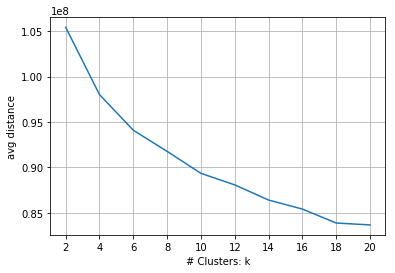

In [101]:

fig, ax = plt.subplots()
ax.plot(clusters, model_score)
ax.set(ylabel='avg distance', xlabel='# Clusters: k')
ax.grid()
plt.xticks(np.arange(2,21,2))
plt.show()

In [71]:
pca_data.shape

(797426, 75)

In [66]:
# Re-fit the k-means model with the selected number of clusters and obtain
# cluster predictions for the general population demographics data.
kmeans = KMeans(10).fit(pca_data)
kmeans_pred = kmeans.predict(pca_data)

### Step 3.2: Apply All Steps to the Customer Data


In [73]:
# Load in the customer demographics data.
customers = pd.read_csv('Udacity_CUSTOMERS_Subset.csv', sep=';')

In [74]:

customers_cleaned = clean_data(customers)

In [77]:
for column in azdias_scaled.columns:
    if column not in customers_cleaned.columns:
        print(column)

GEBAEUDETYP_5.0


In [78]:
customers_cleaned['GEBAEUDETYP_5.0'] = 0
#this column was missing from customer dataset after one-hot encoding

In [79]:
kmeans

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=10, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [80]:
customer_reduced = pca.transform(scaler.transform(imputer.transform(customers_cleaned)))

customer_clusters = kmeans.predict(customer_reduced)

### Step 3.3: Compare Customer Data to Demographics Data


In [81]:
gen_pop = azdias_scaled.shape[0]
gen_pop_all = azdias.shape[0] #including all dropped high NaN data

customer_pop = customers_cleaned.shape[0]
customer_pop_all = customers.shape[0] #including all customers with high NaN data

gen_pop_cluster_count = np.bincount(kmeans_pred)
customer_cluster_count = np.bincount(customer_clusters)

gen_pop_cluster_prop = [x/gen_pop for x in gen_pop_cluster_count]
customer_cluster_prop = [x/customer_pop for x in customer_cluster_count]

In [82]:
prop_data = pd.DataFrame({'gen_pop': gen_pop_cluster_prop, 'customers': customer_cluster_prop}, index=np.arange(1,11))
prop_data.index.names=['Cluster']

In [83]:
#create data frame where each entry in `gen_pop` is % of gen_pop in a cluster
# each entry in `customers` is% of customer population in a cluster
prop_data_all = pd.DataFrame({'gen_pop': [x/gen_pop_all for x in gen_pop_cluster_count], 
                              'customers': [x/customer_pop_all for x in customer_cluster_count]},
                             index=np.arange(1,11))
prop_data_all.index.names=['Cluster']

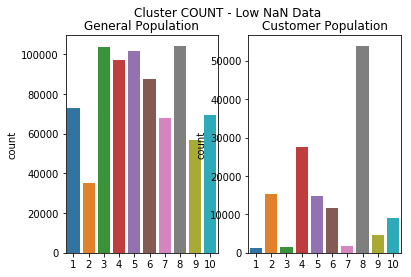

In [107]:
'''CLUSTER COUNT - LOW NAN DATA'''

plt.figure(figsize=(10,5)) # this creates a figure 14 inch wide, 4 inch high
fig, (ax1, ax2) = plt.subplots(1,2, sharey=False)
fig.suptitle('Cluster COUNT - Low NaN Data')
ax1.set_title('General Population')
ax2.set_title('Customer Population')
sns.countplot(kmeans_pred+1, ax=ax1)
sns.countplot(customer_clusters+1, ax=ax2)
plt.show()

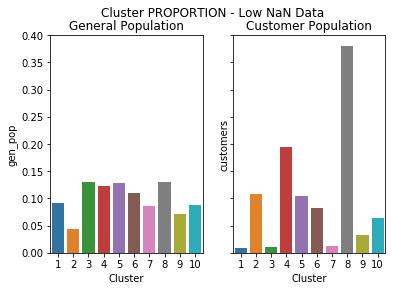

In [106]:
'''CLUSTER PROPORTION - LOW NAN DATA'''

plt.figure(figsize=(14,4)) # this creates a figure 14 inch wide, 4 inch high
fig, (ax1, ax2) = plt.subplots(1,2, sharey=True)
fig.suptitle('Cluster PROPORTION - Low NaN Data')
ax1.set_title('General Population')
ax2.set_title('Customer Population')
sns.barplot(x=prop_data.index, y=prop_data.gen_pop, ax=ax1)
sns.barplot(x=prop_data.index, y=prop_data.customers, ax=ax2)
plt.show()

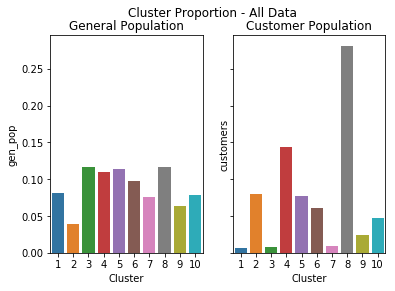

In [86]:
'''CLUSTER PROPORTION - ALL DATA'''

plt.figure(figsize=(14,4)) # this creates a figure 14 inch wide, 4 inch high
fig, (ax1, ax2) = plt.subplots(1,2, sharey=True)
fig.suptitle('Cluster Proportion - All Data')
ax1.set_title('General Population')
ax2.set_title('Customer Population')
sns.barplot(x=prop_data_all.index, y=prop_data_all.gen_pop, ax=ax1)
sns.barplot(x=prop_data_all.index, y=prop_data_all.customers, ax=ax2)
plt.show()

In [89]:
''' What kinds of people are part of a cluster that is overrepresented 
in the customer data compared to the general population?'''

rep = {}

print('\n Cluster Representation - LOW NaN Data\n----------\n')
for i in np.arange(0,10):
    a = customer_cluster_prop[i]
    b = gen_pop_cluster_prop[i]
    rep[i+1] = (a-b)*100

for x in rep:
    if(rep[x]>0):
        print('Cluster %s: OVER represented by %.2f%%'% (x, rep[x]))
    elif(rep[x]<0):
        print('Cluster %s: UNDER represented by %.2f%%'% (x, rep[x]))


 Cluster Representation - LOW NaN Data
----------

Cluster 1: UNDER represented by -8.32%
Cluster 2: OVER represented by 6.42%
Cluster 3: UNDER represented by -11.93%
Cluster 4: OVER represented by 7.32%
Cluster 5: UNDER represented by -2.24%
Cluster 6: UNDER represented by -2.78%
Cluster 7: UNDER represented by -7.32%
Cluster 8: OVER represented by 24.98%
Cluster 9: UNDER represented by -3.78%
Cluster 10: UNDER represented by -2.34%


In [90]:
full_rep = {}

print('\n Cluster Over Representation - FULL Population\n----------\n')
for i in np.arange(0,10):
    a = prop_data_all.customers.iloc[i]
    b = prop_data_all.gen_pop.iloc[i]
    full_rep[i+1] = (a-b)*100

for x in full_rep:
    if(full_rep[x]>0):
        print('Cluster %s: OVER represented by %.2f%%'% (x, full_rep[x]))
    elif(full_rep[x]<0):
        print('Cluster %s: UNDER represented by %.2f%%'% (x, full_rep[x]))



 Cluster Over Representation - FULL Population
----------

Cluster 1: UNDER represented by -7.57%
Cluster 2: OVER represented by 4.06%
Cluster 3: UNDER represented by -10.84%
Cluster 4: OVER represented by 3.51%
Cluster 5: UNDER represented by -3.65%
Cluster 6: UNDER represented by -3.76%
Cluster 7: UNDER represented by -6.74%
Cluster 8: OVER represented by 16.42%
Cluster 9: UNDER represented by -3.91%
Cluster 10: UNDER represented by -3.09%


In [68]:
def cluster_centers(cluster):
    cluster_center = np.around(kmeans.cluster_centers_[cluster-1], decimals=2)
    clusters_sorted = cluster_center[np.argsort(cluster_center)[:]]
    pca_undone=np.around(pca.inverse_transform(kmeans.cluster_centers_[cluster-1]), 
                                                 decimals=2)
    pca_undone_sorted = pca_undone[np.argsort(pca_undone)[:]]
    print('Cluster %s' % cluster)
    print('sorted array\n-----\n Top 3: %s \n Bottom 3: %s '% (np.flip(clusters_sorted[-3:],0), 
                                                               clusters_sorted[:3]))
    print('\n original array\n-----\n %s'% cluster_center)
    
    print('PCA sorted\n-----\n Top 3: %s \n Bottom 3: %s '% (np.flip(pca_undone_sorted[-3:],0), 
                                                               pca_undone_sorted[:3]))
    print('\n PCA Undone\n-----\n %s'% pca_undone)

In [140]:
cluster_centers(cluster=3)

Cluster 3
sorted array
-----
 Top 3: [ 4.62  0.72  0.38] 
 Bottom 3: [-2.43 -2.14 -0.53] 

 original array
-----
 [ 4.62 -2.14 -2.43  0.72 -0.26 -0.21 -0.29 -0.4   0.1   0.38 -0.47 -0.15
  0.14 -0.05 -0.05 -0.04 -0.33  0.22 -0.05  0.02  0.07 -0.27  0.3   0.01
 -0.53  0.03 -0.06  0.2  -0.04  0.11  0.37 -0.06  0.02  0.14  0.1  -0.01
  0.05 -0.22 -0.25 -0.01 -0.08 -0.04  0.05 -0.04 -0.1  -0.03 -0.02 -0.01
  0.02 -0.01 -0.07 -0.03 -0.02  0.02  0.04 -0.04  0.    0.01  0.    0.02
  0.    0.01  0.01  0.04  0.01 -0.    0.01 -0.   -0.    0.04 -0.03 -0.01
  0.01  0.05  0.02]
PCA sorted
-----
 Top 3: [ 1.46  1.31  1.24] 
 Bottom 3: [-1.4  -1.02 -0.97] 

 PCA Undone
-----
 [-0.97  0.93 -1.4   1.15 -0.88  1.03  0.84  0.82 -0.43  0.13 -0.63 -0.47
 -0.13  0.66  0.42 -1.02 -0.55 -0.11 -0.05  1.24  0.53  0.84  0.93  0.97
  0.91 -0.02 -0.02 -0.26 -0.06  0.73 -0.04 -0.38  0.35  0.04 -0.48 -0.25
 -0.6   0.14  0.47  0.4  -0.62 -0.31  0.56 -0.43 -0.29  0.11 -0.63  0.17
  0.14 -0.18 -0.6   0.45  0.63  0.6   

In [141]:
cluster_centers(cluster=8)

Cluster 8
sorted array
-----
 Top 3: [ 3.26  1.06  0.69] 
 Bottom 3: [-4.43 -1.01 -0.98] 

 original array
-----
 [-4.43  0.5   1.06  3.26 -0.9  -1.01 -0.98 -0.7  -0.01  0.1   0.45  0.44
  0.25  0.    0.39 -0.23  0.09  0.21 -0.1   0.69 -0.66 -0.55  0.14 -0.03
  0.19  0.2   0.07  0.18 -0.03 -0.13  0.16 -0.04 -0.07  0.26  0.08  0.06
  0.05  0.05 -0.08 -0.01  0.02 -0.02 -0.05 -0.06  0.01  0.03  0.01 -0.02
 -0.01  0.07  0.01  0.    0.06  0.   -0.02  0.01 -0.03  0.05 -0.04  0.05
  0.02  0.01 -0.02 -0.01  0.01 -0.02  0.01  0.04 -0.01 -0.03  0.02  0.05
 -0.03  0.04 -0.03]
PCA sorted
-----
 Top 3: [ 2.28  2.28  1.9 ] 
 Bottom 3: [-1.34 -0.84 -0.81] 

 PCA Undone
-----
 [ 0.4  -0.08  1.06 -0.58  0.4  -0.58 -0.24 -0.81  1.9  -0.17  0.09  0.02
 -0.24 -0.39 -0.28  0.24  0.33  0.19 -0.19 -0.34 -0.14  0.05 -0.07 -0.4
 -0.25  0.02 -0.1   0.45 -0.1  -1.34 -0.2   0.33 -0.43 -0.12  0.29 -0.06
  0.99 -0.15 -0.61 -0.45  0.77  0.01 -0.05  0.11  0.35 -0.51  0.91  0.35
 -0.52  0.2   0.62 -0.32 -0.47 -0.45  0

In [69]:
cluster_centers(cluster=2)

Cluster 2
sorted array
-----
 Top 3: [ 2.17  1.94  0.72] 
 Bottom 3: [-1.49 -1.42 -1.41] 

 original array
-----
 [-1.49  2.17 -1.42 -1.41 -1.    1.94 -0.64  0.65 -0.12 -0.21  0.7   0.41
 -0.5   0.09  0.04  0.06  0.72 -0.39  0.04 -0.26 -0.06  0.42  0.22  0.07
 -0.3  -0.09 -0.   -0.17 -0.03 -0.13 -0.39 -0.14 -0.1   0.19  0.1   0.2
 -0.07  0.17 -0.01  0.05  0.07 -0.12  0.12 -0.13  0.11  0.07  0.05  0.
  0.09  0.07 -0.05  0.08  0.07  0.02  0.01 -0.07  0.04  0.01  0.05 -0.01
 -0.03  0.03  0.01  0.04 -0.06 -0.01 -0.01 -0.03  0.02 -0.06  0.01 -0.02
 -0.    0.11 -0.04]
PCA sorted
-----
 Top 3: [ 1.61  1.4   0.9 ] 
 Bottom 3: [-0.73 -0.68 -0.68] 

 PCA Undone
-----
 [ 0.63  0.39  0.01 -0.61  0.61 -0.21 -0.61  0.54 -0.15 -0.14  0.35 -0.44
 -0.58 -0.68 -0.38 -0.29  0.41  0.67 -0.68 -0.37  0.41  0.14  0.21 -0.56
 -0.55 -0.04 -0.02 -0.27 -0.09  0.3   0.31  0.16 -0.17 -0.08  0.28 -0.15
  0.02  0.36  0.17 -0.28  0.11  0.39 -0.61  0.47  0.18 -0.05  0.14 -0.56
 -0.14  0.27  0.34 -0.19 -0.37 -0.43 -0. 

> #### Could Also Visualize Clustering in 2 Dimensions:

```python
reduced_data = PCA(n_components=2).fit_transform(df)
clusters = KMeans(n_clusters=best_k, random_state=100).fit(reduced_data)

x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1
hx = (x_max-x_min)/1000.
hy = (y_max-y_min)/1000.
xx, yy = np.meshgrid(np.arange(x_min, x_max, hx), np.arange(y_min, y_max, hy))

Z = clusters.predict(np.c_[xx.ravel(), yy.ravel()])
centroids = clusters.cluster_centers_

def PCA_plot(Z, centroids):
    Z = Z.reshape(xx.shape)
    plt.figure(1, figsize=(20, 10))
    plt.clf()
    plt.imshow(Z, interpolation='nearest',
               extent=(xx.min(), xx.max(), yy.min(), yy.max()),
               cmap=plt.cm.Paired,
               aspect='auto', origin='lower')

    plt.plot(reduced_data[:, 0], reduced_data[:, 1], 'k.',
             markersize=2, alpha=0.1)
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='x', s=169, linewidths=3,
                color='w', zorder=10)
    plt.title('Clustering on the dataset (PCA-reduced data)\n'
              'Centroids are marked with white cross')
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)
    plt.xticks(())
    plt.yticks(())
    plt.show()

PCA_plot(Z, centroids)
```

## Contact me at-
### radhikaagarwal963@gmail.com
--------------------------------------------------------------------------------------------------------------------------